# IMPORTING LIBRARIES


In [ ]:
import numpy as np

from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split # for splitting data
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # for evaluating results

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap


from sklearn.metrics import ConfusionMatrixDisplay


import pandas as pd # .csv , .xlsx

# LOADING DATASET


In [ ]:
hd = pd.read_csv("data_cleveland_2.csv")
hd

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y0
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,48,0,2,-9,308,0,1,-9,-9,2.0,1,-9,-9,0
587,36,1,2,120,166,0,0,180,0,0.0,-9,-9,-9,0
588,48,1,3,110,211,0,0,138,0,0.0,-9,-9,6,0
589,47,0,2,140,257,0,0,135,0,1.0,1,-9,-9,0


In [ ]:
#Check kinds of label
hd['y0'].unique()

array([0, 1])

In [ ]:
# Features
hd_x = x = hd.drop(columns = 'y0', axis=1)
hd_x

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,48,0,2,-9,308,0,1,-9,-9,2.0,1,-9,-9
587,36,1,2,120,166,0,0,180,0,0.0,-9,-9,-9
588,48,1,3,110,211,0,0,138,0,0.0,-9,-9,6
589,47,0,2,140,257,0,0,135,0,1.0,1,-9,-9


In [ ]:
# Label
hd_y = hd['y0']
hd_y

0      0
1      1
2      1
3      0
4      0
      ..
586    0
587    0
588    0
589    0
590    0
Name: y0, Length: 591, dtype: int64

# SPLITTING DATA


In [ ]:
# Aim: 70% train and 30% test
x_train, x_test, y_train, y_test = train_test_split( hd_x, hd_y, test_size = 0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(413, 13)
(178, 13)
(413,)
(178,)


# NORMALIZATION

In [ ]:
#Aim: Input data must be ranged from 0 to 1

#From sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler


MinMaxScaler()

In [ ]:
scaler.fit(x_train) #Compute the minimum and maximum to be used for later scaling.
x_train_norm = scaler.transform(x_train)
x_test_norm = scaler.transform(x_test)
x_train_norm

array([[0.30434783, 1.        , 0.66666667, ..., 1.        , 0.5       ,
        1.        ],
       [0.63043478, 1.        , 1.        , ..., 0.91666667, 0.5       ,
        0.9375    ],
       [0.06521739, 1.        , 1.        , ..., 0.91666667, 0.        ,
        0.        ],
       ...,
       [0.39130435, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.56521739, 1.        , 0.        , ..., 0.83333333, 0.        ,
        0.        ],
       [0.73913043, 1.        , 0.66666667, ..., 0.91666667, 0.66666667,
        1.        ]])

# FINDING AN OPTIMAL K 

## EUCLIDEAN METRIC MEASUREMENT

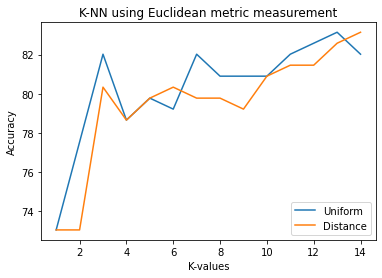

In [ ]:
accuracy, accuracy_1, k_order = [], [], []

for k in range (1, 15):
    model = neighbors.KNeighborsClassifier(n_neighbors= k, weights= 'uniform', p= 2, metric= 'minkowski')
    model.fit(x_train_norm, y_train)
    y_pred_4 = model.predict(x_test_norm)
    accuracy.append(100*accuracy_score(y_test, y_pred_4))
  

    model_1 = neighbors.KNeighborsClassifier(n_neighbors= k, weights= 'distance', p= 2, metric= 'minkowski')
    model_1.fit(x_train_norm, y_train)
    y_pred_1 = model_1.predict(x_test_norm)
    accuracy_1.append(100*accuracy_score(y_test, y_pred_1))
    k_order.append(k)
#Plotting data
plt.plot(k_order, accuracy, label = 'Uniform')
plt.plot(k_order, accuracy_1, label = 'Distance')
plt.xlabel('K-values')
plt.ylabel('Accuracy')
plt.title('K-NN using Euclidean metric measurement')
plt.legend()

## MANHATTAN METRIC MEASUREMENT

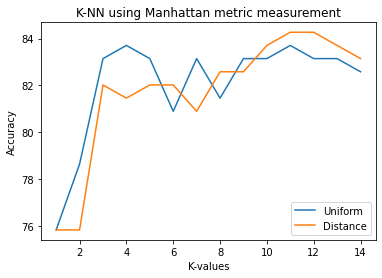

In [ ]:
accuracy_2, accuracy_3 = [], []
for k in range (1, 15):
    model_2 = neighbors.KNeighborsClassifier(n_neighbors= k, weights= 'uniform', p= 1, metric= 'minkowski')
    model_2.fit(x_train_norm, y_train)
    y_pred_2 = model_2.predict(x_test_norm)
    accuracy_2.append(100*accuracy_score(y_test, y_pred_2))

    model_3 = neighbors.KNeighborsClassifier(n_neighbors= k, weights= 'distance', p= 1, metric= 'minkowski')
    model_3.fit(x_train_norm, y_train)
    y_pred_3 = model_3.predict(x_test_norm)
    accuracy_3.append(100*accuracy_score(y_test, y_pred_3))

#Plotting data
plt.plot(k_order, accuracy_2, label = 'Uniform')
plt.plot(k_order, accuracy_3, label = 'Distance')
plt.xlabel('K-values')
plt.ylabel('Accuracy')
plt.title('K-NN using Manhattan metric measurement')
plt.legend()

# K-NEAREST NEIGHBORS
All three are algorithms used for the Nearest Neighbour search. The **Ball Tree** and the **KD Tree algorithm** are tree algorithms used for spatial division of data points and their allocation into…

In [ ]:
#I decided to design a Euclidean K-NN
neigh = KNeighborsClassifier(n_neighbors=  4, weights= 'distance', algorithm= 'auto', leaf_size=30, p=1, metric='minkowski', metric_params=None, n_jobs=None)
neigh.fit(x_train_norm, y_train)

#Predicted labels
y_test_pred = neigh.predict(x_test_norm)
y_test_pred

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0])

In [ ]:
#Ground truth
np.array(y_test)

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0])

# CONFUSION MATRIX


Classification report using the K-NNClassifier: 
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        97
           1       0.82      0.75      0.79        81

    accuracy                           0.81       178
   macro avg       0.82      0.81      0.81       178
weighted avg       0.82      0.81      0.81       178



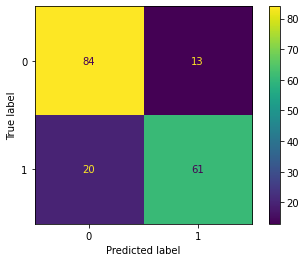

In [ ]:
print('Classification report using the K-NNClassifier: ')
print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=neigh.classes_)
disp.plot()

plt.show()

# COMPARED WITH LOGISTIC REGRESSION

In [ ]:
model = LogisticRegression(max_iter = 777, random_state= 0)
model = model.fit(x_train_norm, y_train)
model

LogisticRegression(max_iter=777, random_state=0)

In [ ]:
# Predicted Labels 
y_test_pred = model.predict(x_test_norm)
y_test_pred

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0])

In [ ]:
# Ground truth
np.array(y_test)

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0])

Classification report using the Logistic Regression: 
Test accuracy:  0.8033707865168539
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        97
           1       0.82      0.73      0.77        81

    accuracy                           0.80       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.80      0.80      0.80       178



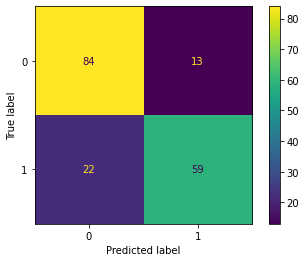

In [ ]:
print('Classification report using the Logistic Regression: ')
print('Test accuracy: ', accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=neigh.classes_)
disp.plot()

plt.show()